# Classifying Malignant/Benign Breast Tumors with Logistic Regression

Welcome to the practical section of module 5.2. Here we'll be using **Logistic Regression** with the [Wisconsin Breast Cancer Database](http://bit.ly/1IoTs7x) to predict whether a patient's tumor is benign or malignant based on tumor cell charactaristics. This is just one example from many to which machine learning and classification could offer great insights and aid.

By the end of the module, we'll have a trained logistic regression model on the a subset of the features presented in the dataset that is very accurate at diagnosing the condition of the tumor based on these features. We'll also see how we can make interseting inferences from the model that could be helpful for the physicians in diagnosing cancer

In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm  # this is for colormaps for 2D surfaces
from mpl_toolkits.mplot3d import Axes3D  # this is for 3D plots
plt.rcParams['figure.figsize'] = (10, 10)

# Visualizing the Data

We'll start off by exploring and visualizing our dataset to see what attributes we have, how the class of the tumor is represented and how the data correlates.

In [2]:
dataset = pd.read_csv('../datasets/breast-cancer-wisconson.csv')
dataset[:10]

,ID,CT,UCS,UCSh,MA,SECS,BN,BC,NN,M,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


To understand the meaning of the abbreviations we can consult the [dataset's website](http://bit.ly/1IoTs7x) to find a description of each attribute in order. Here we'll be focusing on three attributes: **CT, UCS and UCSh** which stand for **Clump Thickness**, **Uniformity of Cell Size** and **Uniformity of Cell Shape** respectively. If you noticed the **Class** attribute at the end (which gives the class of the tumor), you'll find that it takes either 2 or 4; where 2 represents a *benign* tumor while 4 represents a *malignant* tumor. We'll chnage that to a more expressive values and make a benign tumor represented by 0 and mlignants by 1s.

In [18]:
focus_dataset = dataset[["CT", "UCS", "UCSh", "Class"]]  # take only the attributes we'll focus on
focus_dataset.is_copy = False  # this is just to hide a nasty warning!
focus_dataset.loc[:, ("Class")] = [0 if tclass == 2 else 1 for tclass in dataset["Class"]]  # convert Class to 0/1

focus_dataset[:10]

,CT,UCS,UCSh,Class
0,5,1,1,0
1,5,4,4,0
2,3,1,1,0
3,6,8,8,0
4,4,1,1,0
5,8,10,10,1
6,1,1,1,0
7,2,1,2,0
8,2,1,1,0
9,4,2,1,0


We can visually present our data using scatter plots in a 3D space to have more understanding of the how the data points group and how the attributes of Clump Thickness, Uniformity of Cell Size and Uniformity of Cell Shape correlate with the class of the tumor.

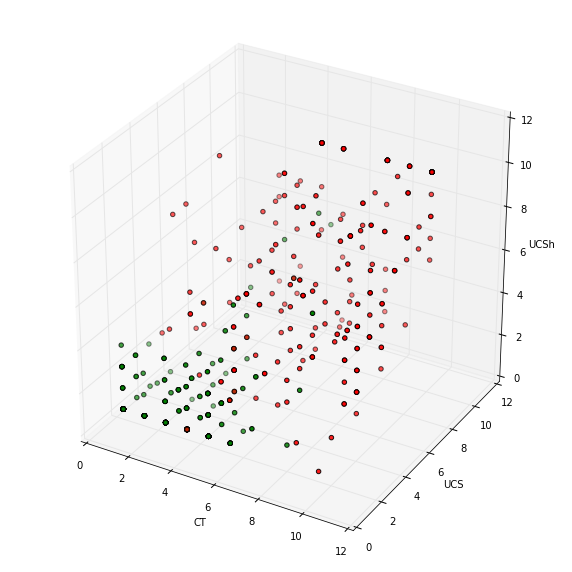

In [35]:
benign_selector = focus_dataset["Class"] == 0

benign_datapoints = focus_dataset[benign_selector]
malignant_datapoints = focus_dataset[~benign_selector]

plot3D = plt.figure()
plot3D = plot3D.gca(projection='3d')

# here we create our scatter plot given our data
plot3D.scatter(benign_datapoints["CT"], benign_datapoints["UCS"], benign_datapoints["UCSh"], c='green')
plot3D.scatter(malignant_datapoints["CT"], malignant_datapoints["UCS"], malignant_datapoints["UCSh"], c='red')

# now we'll put some labels on the axes
plot3D.set_xlabel("CT")
plot3D.set_ylabel("UCS")
plot3D.set_zlabel("UCSh")

# finally we show our plot
plt.show()

The green data points in the plot represent benign tumors while the red ones represent malignant ones. The 3D visualization shows that the data points for each class tends to cluster togther with the exception of some noisy data points. This suggets that Logistic Regression would be a good estimator for the dataset.

# Training the Logistic Regression Model

Scikit-learn's linear models bundle offers the **LogisticRegression** algorithm that trains a data set to fit a hypothesis function in the form:
$$h_w(X) = g(w^TX) \hspace{0.5em} \text{where } g \text{ is a logistic function}$$

Just like we saw in the videos. However, **LogisticRegression** doesn't use gradient descent to train the model, it uses other iterative optimzation methods (shuch as [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization)); This is very suitable for small and medium datasets like we have here. But in the case of a large dataset, gradient descent would be the better choice. To train a logistic regression model using gradient descent with scikit-learn, use [SGDClassifer](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier). Here we'll work with **LogisticRegression**.

Before training the model, we'll first split our data into two parts: one for training and one for testing and evaluation. Remember that the general rule is to divide the dataset into three parts: training, validation, and testing; but because we'll not be doing any parameter tuning here we won't need the validation set, hence we'll divide the dataset into two parts only.

In [48]:
dataset_size = len(focus_dataset)
training_size = np.floor(dataset_size * 0.6).astype(int)

X_training = focus_dataset[["CT", "UCS", "UCSh"]][:training_size]
y_training = focus_dataset["Class"][:training_size]

X_test = focus_dataset[["CT", "UCS", "UCSh"]][training_size:]
y_test = focus_dataset["Class"][training_size:]

We can use **LogisticRegression** in the same way that we used the **SGDRegressor** when we worked with Linear Regression, and this is an amazing charactaristic of scikit-learn; that it has a standard API across the very different models. So to train our model, we'll create an instance of **LogisticRegression** and just call the **fit** method on that instace and pass our features (X) and labels (y).

In [49]:
model = LogisticRegression()
model.fit(X_training, y_training)

w0 = model.intercept_
w1 = coefs[0]
w2 = coefs[1]
w3 = coefs[2]

print "Trained Model: h(x) = g(%0.2f + %0.2fx₁ + %0.2fx₂ + %0.2fx₃)" % (w0, w1, w2, w3)

Trained Model: h(x) = g(-5.03 + 0.40x₁ + 0.41x₂ + 0.59x₃)


Where $x_1,x_2,x_3$ represent Clump Thickness, Uniformity of Cell Size, and Uniformity of Cell Shape respectively.

# Visualizing the Decision Boundary

As we learned from the videos, a classifer when presented with new data baiscally takes a decision: whether this new data belongs to class A or class B. We can visualize how the classifier makes a decision by trying to visualize its **decision boundary**: the boundary below which data belongs to some class, and above which data belongs to the other class.

You can imagine the decision boundary as a line (or as in our case here, a plane) that seperates the two classes. The equation of the boundary is $w^TX = 0$, but we cannot plot it in this form. We'll need to convert it to a form we can plot.

In our case here: $w^TX = w_0 + w_1x_1 + w_2x_2 + w_3x_3$

So the equation of the boundary plane is: $w_0 + w_1x_1 + w_2x_2 + w_3x_3 = 0$

To be able to plot this, we need a formula that gives the value $x_3$ in terms of $x_1$ and $x_2$. With very simple algebriac manipulation we can find that:

$$x_3 = \frac{-w_0}{w_3} + \frac{-w_1}{w_3}x_1 + \frac{-w_2}{w_3}x_2$$

This is the equation we're going to use to plot our decision boundary plane.

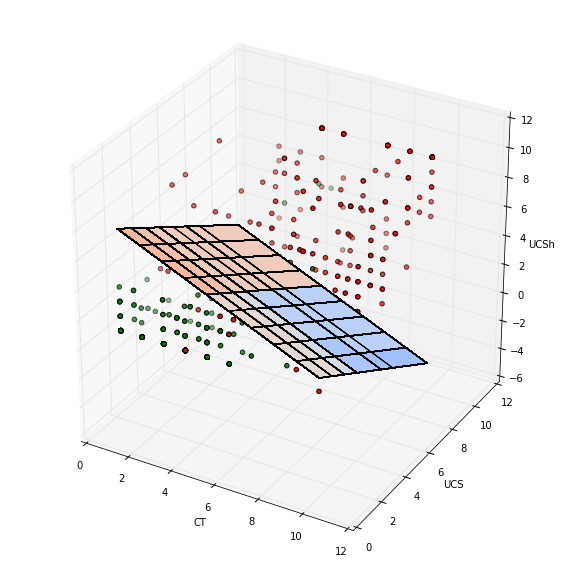

In [34]:
benign_selector = focus_dataset["Class"] == 0

benign_datapoints = focus_dataset[benign_selector]
malignant_datapoints = focus_dataset[~benign_selector]

plot3D = plt.figure()
plot3D = plot3D.gca(projection='3d')

# here we create our scatter plot given our data
plot3D.scatter(benign_datapoints["CT"], benign_datapoints["UCS"], benign_datapoints["UCSh"], c='green')
plot3D.scatter(malignant_datapoints["CT"], malignant_datapoints["UCS"], malignant_datapoints["UCSh"], c='red')

X_plane, Y_plane = np.meshgrid(focus_dataset["CT"], focus_dataset["UCS"])
Z_plane = (-w0/w3) + (-w1/w3) * X_plane + (-w2/w3) * Y_plane

plot3D.plot_surface(X_plane,Y_plane, Z_plane, cmap=cm.coolwarm)

# now we'll put some labels on the axes
plot3D.set_xlabel("CT")
plot3D.set_ylabel("UCS")
plot3D.set_zlabel("UCSh")

# finally we show our plot
plt.show()

# Evaluation and Inferences

As we know, machine learning models are mainly used for two purposes: predecting information for new data, and making inferences about the data we have. In the folloing we'll explore how good our trained Logistic Regression model in prediction and what can we infer from the formulation of the model.

### Evaluating Predection Accuracy

There are many ways we can evaluate the accuracy of a classifier. One of these ways is provided by scikit-learn through the **score** method of the model. This function computes the mean accuracy of the model, which is expressed mathematically as:
$$\frac{1}{n}\sum_{i = 1}^{n} 1(y_i = \widehat{y_i}) \hspace{0.5em} \text{where } \widehat{y_i} \text{ is the predecited value}$$

$$,1(P) = 
\left\{
\begin{matrix}
1 \hspace{1.5em} \text{if } P \text{ is true}\\
0 \hspace{1.5em} \text{otherwise}
\end{matrix}
\right.$$

The closer this value is to one, the more accurate our model is.

In [51]:
accuracy = model.score(X_test, y_test)

"Model's Mean Accuracy: %0.3f" % (accuracy)

"Model's Mean Accuracy: 0.979"

Such a high value tells us that the model is very good at predection, but it's not perfect; appearntly there some missclassifications. When we deal with a sensitive topic like diagnosing cancer, we need to know exactly how the data are missclassified. Obviously, missclassifying a benign tumor as malignant (a **false-positive**) is not as bad as missclassifying a malignant tumor as benign (a **false-negative**).

A way to look closely at false-positives and false-negatives is called the **confusion matrix**. A confusion matrix is a matrix $C$ where the rows represent the true classes of the data, and the columns represent the predicted classes of the data. Each element $C_{ij}$ is the number of data points that its true class is $i$ and its predicted class is $j$.

To compute the confustion matrix we'll need the true classes of the data (we have those in *y_test*) and the predicted classes of the data (we can get those with the model's **predict** method). Once we have those we can use scikit-learn's **confusion_matrix** function from the metrics package by passing to it the true and predicted classes of our data.

In [59]:
y_predicted = model.predict(X_test)

cmatrix = confusion_matrix(y_test, y_predicted)

print "Number of True-Negatives: %d" % (cmatrix[0,0])
print "Number of True-Positives: %d" % (cmatrix[1, 1])
print "Number of False-Negatives: %d" % (cmatrix[1, 0])
print "Number of False-Positives: %d" % (cmatrix[0, 1])

Number of True-Negatives: 210
Number of True-Positives: 64
Number of False-Negatives: 2
Number of False-Positives: 4


We found that a big part of the error comes from false-positives, this boosts our confidence in the model's accuracy. We can plot the confusion matrix in a heatmap fashion using **metaplotlib** for better visulaization of the accuracy.

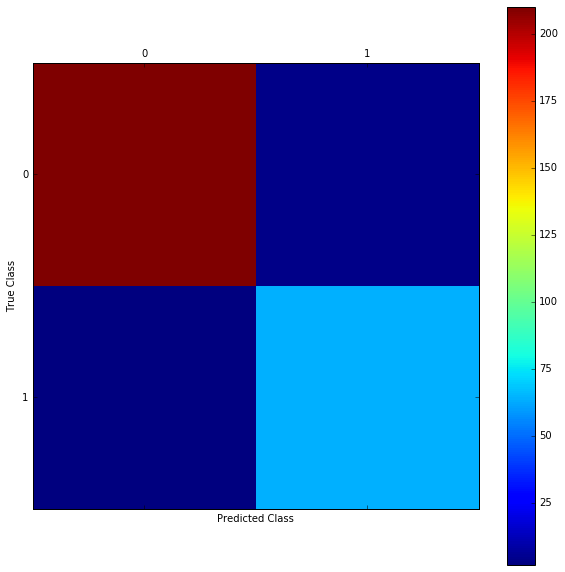

In [60]:
plt.matshow(cmatrix)  # this plots the matrix 

plt.colorbar()  # puts a color bar to show what each color represents

plt.ylabel('True Class')
plt.xlabel('Predicted Class')

plt.show()

### Making Inferences About the Data

By looking at the weigths of the model and exploiting the semantics of the noun **weight** with respect to the feature, i.e. each weight reprsents how much each charctaristic weighs in the diagnosis; we can find that Clump Thickness and the Uniformity of Cell Size has approximately the same weigths in the diagnosis while the Uniformity of Cell Shape has a larger weight. A piece of information like that would direct the physicians to test the Uniformity of Cell Shape before any other indicator as it contributes more heavily in the diagnosis. Similiar and other infernces could be made by growing the model larger with the remaining charctaristics we left out. As an **Exercise**: Using what you learned here, go on and build bigger and more complex models for the dataset and how the accuracy changes and what infernces could be made form these models.